In [2]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB 1.9 MB/s eta 0:00:37
   ---------------------------------------- 0.2/70.9 MB 2.4 MB/s eta 0:00:30
   ---------------------------------------- 0.5/70.9 MB 3.9 MB/s eta 0:00:19
   ---------------------------------------- 0.7/70.9 MB 4.2 MB/s eta 0:00:17
    --------------------------------------- 1.1/70.9 MB 4.9 MB/s eta 0:00:15
    --------------------------------------- 1.6/70.9 MB 5.9 MB/s eta 0:00:12
   - -------------------------------------- 2.0/70.9 MB 6.4 MB/s eta 0:00:11
   - -------------------------------------- 2.4/70.9 MB 6.7 MB/s eta 0:00:11
   - -------------------------------------- 2.8/70.9 MB 6.9 MB/s eta 0:00:10
   - ---------------------------

In [9]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from xgboost import XGBClassifier

import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv('H2HBABBA3269.csv')

In [11]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200792293,UNIFIE systems,2019-02-28 00:00:00,2019.0,1.928797e+09,2019-02-13,20190214,20190213,20190228.0,USD,RV,1.0,NaN,25193.80,20190213.0,NAA8,1.928797e+09,0
1,U001,0200782669,SYGMA,2019-01-31 00:00:00,2019.0,1.928581e+09,2019-01-10,20190107,20190110,20190211.0,USD,RV,1.0,NaN,43960.21,20190110.0,NA32,1.928581e+09,0
2,U001,0200726979,BJ'S llc,NaN,2020.0,1.930587e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,1.0,NaN,336.08,20200303.0,NAA8,1.930587e+09,1
3,U001,0200865666,RESTAU associates,2019-09-03 00:00:00,2019.0,1.929735e+09,2019-08-19,20190812,20190819,20190903.0,USD,RV,1.0,NaN,670.08,20190819.0,NAA8,1.929735e+09,0
4,U001,0200732755,KROGER in,2019-09-03 00:00:00,2019.0,1.929753e+09,2019-08-18,20190816,20190818,20190902.0,USD,RV,1.0,NaN,54616.65,20190818.0,NAA8,1.929753e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200719300,SYSTEMS associates,2019-07-31 00:00:00,2019.0,1.929619e+09,2019-07-15,20190713,20190715,20190730.0,USD,RV,1.0,NaN,2568.00,20190715.0,NAA8,1.929619e+09,0
49996,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930799e+09,2020-04-18,20200418,20200418,20200503.0,USD,RV,1.0,NaN,2325.38,20200418.0,NAH4,1.930799e+09,1
49997,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930859e+09,2020-05-05,20200505,20200505,20200520.0,USD,RV,1.0,NaN,44462.63,20200505.0,NAH4,1.930859e+09,1
49998,U001,0200762301,C&S WH,NaN,2020.0,1.930754e+09,2020-04-06,20200406,20200406,20200421.0,USD,RV,1.0,NaN,74067.22,20200406.0,NAC6,1.930754e+09,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [13]:
data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

# Removing Nan Columns

In [14]:
#since area_buisness in NaN we drop it
data=data.drop(columns=['area_business'])

In [15]:
data.shape

(50000, 18)

# Spilliting the data

In [16]:
main_train = data[data.clear_date.isnull()==False]
main_test = data[data.clear_date.isnull()]

In [17]:
data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [18]:
main_train=main_train.dropna()

# Droping contants features

In [19]:
# droping the constant features i.e document type ,posting_id,is_open
main_train = main_train.drop(columns = ['isOpen', 'posting_id','document type'])

In [20]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200792293,UNIFIE systems,2019-02-28 00:00:00,2019.0,1.928797e+09,2019-02-13,20190214,20190213,20190228.0,USD,25193.80,20190213.0,NAA8,1.928797e+09
1,U001,0200782669,SYGMA,2019-01-31 00:00:00,2019.0,1.928581e+09,2019-01-10,20190107,20190110,20190211.0,USD,43960.21,20190110.0,NA32,1.928581e+09
3,U001,0200865666,RESTAU associates,2019-09-03 00:00:00,2019.0,1.929735e+09,2019-08-19,20190812,20190819,20190903.0,USD,670.08,20190819.0,NAA8,1.929735e+09
4,U001,0200732755,KROGER in,2019-09-03 00:00:00,2019.0,1.929753e+09,2019-08-18,20190816,20190818,20190902.0,USD,54616.65,20190818.0,NAA8,1.929753e+09
5,U001,0200759878,SA foundation,2019-05-03 00:00:00,2019.0,1.929167e+09,2019-04-18,20190418,20190418,20190503.0,USD,57821.30,20190418.0,NAH4,1.929167e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,U001,0200769623,WAL-MAR us,2019-10-09 00:00:00,2019.0,1.929932e+09,2019-09-29,20190929,20190929,20191014.0,USD,39061.29,20190929.0,NAH4,1.929932e+09
49991,U001,0200797452,US trust,2019-05-06 00:00:00,2019.0,1.929175e+09,2019-04-20,20190419,20190420,20190505.0,USD,34774.40,20190420.0,NAA8,1.929175e+09
49992,U001,200744019,TARG llc,2019-07-23 00:00:00,2019.0,1.929566e+09,2019-07-04,20190702,20190704,20190719.0,USD,4769.89,20190704.0,NAA8,1.929566e+09
49995,U001,0200719300,SYSTEMS associates,2019-07-31 00:00:00,2019.0,1.929619e+09,2019-07-15,20190713,20190715,20190730.0,USD,2568.00,20190715.0,NAA8,1.929619e+09


# Removing Duplicate columns

In [21]:
#remove duplicate columns since invoice id and documnet id are the same

main_train= main_train.drop(columns=['doc_id'])

# Removing column having unique entries

In [22]:
# now since invice id in unique so we are going to drop it
main_train=main_train.drop(columns='invoice_id')

# Removing Irrelevent Columns

In [23]:
#now we are going to remove irrelevant columns which not effect predict model
main_train=main_train.drop(columns=['name_customer','document_create_date'])

In [24]:
main_train

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200792293,2019-02-28 00:00:00,2019.0,2019-02-13,20190213,20190228.0,USD,25193.80,20190213.0,NAA8
1,U001,0200782669,2019-01-31 00:00:00,2019.0,2019-01-10,20190110,20190211.0,USD,43960.21,20190110.0,NA32
3,U001,0200865666,2019-09-03 00:00:00,2019.0,2019-08-19,20190819,20190903.0,USD,670.08,20190819.0,NAA8
4,U001,0200732755,2019-09-03 00:00:00,2019.0,2019-08-18,20190818,20190902.0,USD,54616.65,20190818.0,NAA8
5,U001,0200759878,2019-05-03 00:00:00,2019.0,2019-04-18,20190418,20190503.0,USD,57821.30,20190418.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...
49990,U001,0200769623,2019-10-09 00:00:00,2019.0,2019-09-29,20190929,20191014.0,USD,39061.29,20190929.0,NAH4
49991,U001,0200797452,2019-05-06 00:00:00,2019.0,2019-04-20,20190420,20190505.0,USD,34774.40,20190420.0,NAA8
49992,U001,200744019,2019-07-23 00:00:00,2019.0,2019-07-04,20190704,20190719.0,USD,4769.89,20190704.0,NAA8
49995,U001,0200719300,2019-07-31 00:00:00,2019.0,2019-07-15,20190715,20190730.0,USD,2568.00,20190715.0,NAA8


In [25]:
main_train.nunique()

business_code                 6
cust_number                1350
clear_date                  397
buisness_year                 2
posting_date                422
document_create_date.1      422
due_in_date                 489
invoice_currency              2
total_open_amount         35527
baseline_create_date        431
cust_payment_terms           72
dtype: int64

# Date Time Conversion

In [26]:
main_train['document_create_date.1']=pd.to_datetime(main_train['document_create_date.1'], format='%Y%m%d')
main_train['due_in_date']=pd.to_datetime(main_train['due_in_date'], format='%Y%m%d')
main_train['baseline_create_date']=pd.to_datetime(main_train['baseline_create_date'], format='%Y%m%d')
main_train['clear_date']=pd.to_datetime(main_train['clear_date']).dt.date  #removing the time part sice its zero evrywhere
main_train['clear_date']=pd.to_datetime(main_train.clear_date) #string object to datetime

In [27]:
main_train['posting_date']=pd.to_datetime(main_train['posting_date'])

# Sorting the entries by Posting date

In [28]:
main_train.sort_values(by=['posting_date'],inplace=True)

# #some invoices are created before  baseline create date so we are removing those here Kind of Outlier

In [29]:
temp = pd.Series(main_train['document_create_date.1'] - main_train['baseline_create_date']).dt.days

In [30]:
rows_to_drop = temp.value_counts().to_frame(name = 'count')

In [31]:
# No. of rows to drop satisfying the condition
rows_to_drop[(rows_to_drop.index <0)].sum()

count    2545
dtype: int64

In [32]:
main_train = main_train[((temp==0) | (temp>0))].reset_index(drop=True)

In [33]:
#now removing document_create_date.1 date since all the are now coreect 
main_train = main_train.drop(columns = ['document_create_date.1'])

In [34]:
main_train.dtypes , main_train.shape

(business_code                   object
 cust_number                     object
 clear_date              datetime64[ns]
 buisness_year                  float64
 posting_date            datetime64[ns]
 due_in_date             datetime64[ns]
 invoice_currency                object
 total_open_amount              float64
 baseline_create_date    datetime64[ns]
 cust_payment_terms              object
 dtype: object,
 (37454, 10))

# Adding column like payemnt term delay due term in the main_train

In [35]:
main_train['payment_term']=pd.Series(main_train['clear_date'] - main_train['baseline_create_date']).dt.days
main_train['due_term']=pd.Series(main_train['due_in_date'] - main_train['baseline_create_date']).dt.days
main_train['delay'] = main_train['payment_term'] - main_train['due_term']


In [36]:
main_train = main_train.drop(columns = ['clear_date'])

In [37]:
main_train

,business_code,cust_number,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,payment_term,due_term,delay
0,U001,0200769623,2019.0,2018-12-30,2019-01-14,USD,580.67,2018-12-30,NAH4,10,15,-5
1,U001,0200794332,2019.0,2018-12-30,2019-01-14,USD,15284.38,2018-12-30,NAAX,16,15,1
2,U001,0200769623,2019.0,2018-12-30,2019-01-14,USD,28485.61,2018-12-30,NAH4,10,15,-5
3,U001,0200726979,2019.0,2018-12-30,2019-01-14,USD,186.40,2018-12-30,NAA8,16,15,1
4,U001,0200014556,2019.0,2018-12-30,2019-01-14,USD,69249.78,2018-12-30,NAA8,15,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37449,U001,0200780383,2020.0,2020-02-27,2020-03-13,USD,48029.58,2020-02-27,NAA8,19,15,4
37450,U001,0200759878,2020.0,2020-02-27,2020-03-13,USD,65988.21,2020-02-27,NAH4,15,15,0
37451,U001,0200721330,2020.0,2020-02-27,2020-03-08,USD,77434.89,2020-02-27,NA10,14,10,4
37452,U001,0200759878,2020.0,2020-02-27,2020-03-13,USD,65988.21,2020-02-27,NAH4,15,15,0


<Axes: xlabel='payment_term', ylabel='posting_date'>

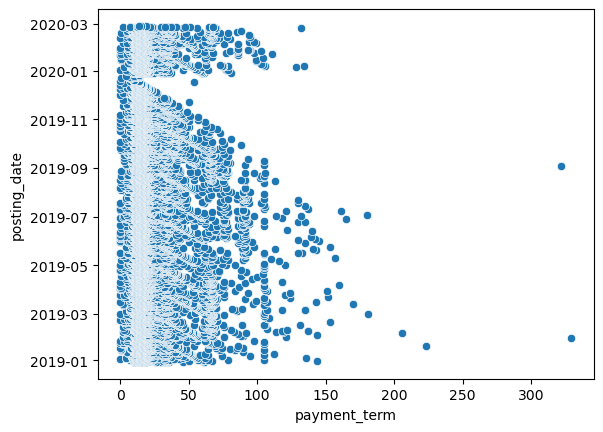

In [38]:
#No direct trend
sns.scatterplot(data=main_train, x="payment_term", y="posting_date")

# Oulier Removal

In [39]:
payment_max = 100
main_train[main_train['payment_term']>=payment_max]['payment_term'].value_counts().sum()

128

In [40]:
main_train = main_train[(main_train['total_open_amount'] > 1) & (main_train['payment_term']<=payment_max)].reset_index(drop=True)

In [41]:
main_train.shape

(37327, 12)

In [42]:
#now droping payment term beacuse cant use in main test clear date is none there
main_train = main_train.drop(columns = ['payment_term'])

# Split Data

In [43]:

# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e payment_term
X = main_train.drop('delay',axis=1)

# y --> contains only the target value 
y = main_train['delay']

In [44]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [45]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [46]:
X_train.shape , X_val.shape , X_test.shape

((26128, 10), (5599, 10), (5600, 10))

# EDA

<Axes: xlabel='delay', ylabel='Density'>

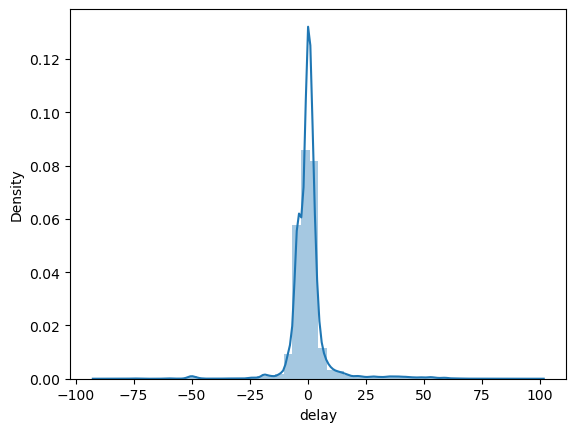

In [47]:
# distribution of the target column 
# slight skewed distribution
# outliers present but not that significant , hence  
sns.distplot(y_train)

<Axes: xlabel='delay', ylabel='posting_date'>

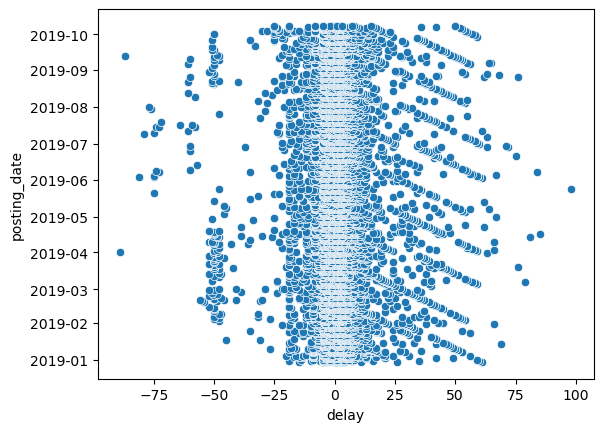

In [48]:
#No direct trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="posting_date")

# Feature Engineering

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26128 entries, 0 to 26127
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         26128 non-null  object        
 1   cust_number           26128 non-null  object        
 2   buisness_year         26128 non-null  float64       
 3   posting_date          26128 non-null  datetime64[ns]
 4   due_in_date           26128 non-null  datetime64[ns]
 5   invoice_currency      26128 non-null  object        
 6   total_open_amount     26128 non-null  float64       
 7   baseline_create_date  26128 non-null  datetime64[ns]
 8   cust_payment_terms    26128 non-null  object        
 9   due_term              26128 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 2.2+ MB


# Label Encoding


In [50]:
from sklearn.preprocessing import LabelEncoder
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_train['invoice_currency'])
X_train['invoice_currency'] = invoice_currency_encoder.transform(X_train['invoice_currency'])

In [51]:
X_val['invoice_currency'] = invoice_currency_encoder.transform(X_val['invoice_currency'])
X_test['invoice_currency'] = invoice_currency_encoder.transform(X_test['invoice_currency'])

In [52]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code'] = business_code_encoder.transform(X_train['business_code'])

In [53]:
X_val['business_code'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code'] = business_code_encoder.transform(X_test['business_code'])

In [54]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number'] = cust_number_encoder.transform(X_train['cust_number'])

In [55]:
# finding what are the new catagories in the validation set
diff = set(X_val['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)


In [56]:
X_val['cust_number'] = cust_number_encoder.transform(X_val['cust_number'])


In [57]:
# doing same thing for test also

diff1 = set(X_test['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff1:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)


In [58]:
X_test['cust_number'] = cust_number_encoder.transform(X_test['cust_number'])

In [59]:
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

In [60]:
# finding what are the new catagories in the validation set
diff3 = set(X_val['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff3:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)


In [61]:
X_val['cust_payment_terms'] = cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])

In [62]:
diff4 = set(X_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff4:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)


In [63]:
X_test['cust_payment_terms'] = cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [64]:
X_train.dtypes

business_code                    int32
cust_number                      int32
buisness_year                  float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                 int32
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms               int32
due_term                         int64
dtype: object

In [65]:
X_train=X_train.drop(columns=['posting_date'])
X_val=X_val.drop(columns=['posting_date'])
X_test=X_test.drop(columns=['posting_date'])

### Splitting dates into days moth year

In [66]:
def helper_map(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [67]:
X_train['due_in_date.days'] = X_train['due_in_date'].dt.day
X_train['due_in_date.month'] = X_train['due_in_date'].dt.month
X_train['due_in_date.year'] = X_train['due_in_date'].dt.year

X_val['due_in_date.days'] = X_val['due_in_date'].dt.day
X_val['due_in_date.month'] = X_val['due_in_date'].dt.month
X_val['due_in_date.year'] = X_val['due_in_date'].dt.year

X_test['due_in_date.days'] = X_test['due_in_date'].dt.day
X_test['due_in_date.month'] = X_test['due_in_date'].dt.month
X_test['due_in_date.year'] = X_test['due_in_date'].dt.year

In [68]:
X_train ,X_val, X_test = helper_map(['due_in_date'])

In [69]:
X_train['baseline_create_date.days'] = X_train['baseline_create_date'].dt.day
X_train['baseline_create_date.month'] = X_train['baseline_create_date'].dt.month
X_train['baseline_create_date.year'] = X_train['baseline_create_date'].dt.year

X_val['baseline_create_date.days'] = X_val['baseline_create_date'].dt.day
X_val['baseline_create_date.month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_date.year'] = X_val['baseline_create_date'].dt.year

X_test['baseline_create_date.days'] = X_test['baseline_create_date'].dt.day
X_test['baseline_create_date.month'] = X_test['baseline_create_date'].dt.month
X_test['baseline_create_date.year'] = X_test['baseline_create_date'].dt.year

In [70]:
X_train ,X_val, X_test = helper_map(['baseline_create_date'])

In [71]:
X_train.reset_index(drop=True,inplace=True)

# Feature Selection

ValueError: Unable to fill values because RangeIndex cannot contain NA

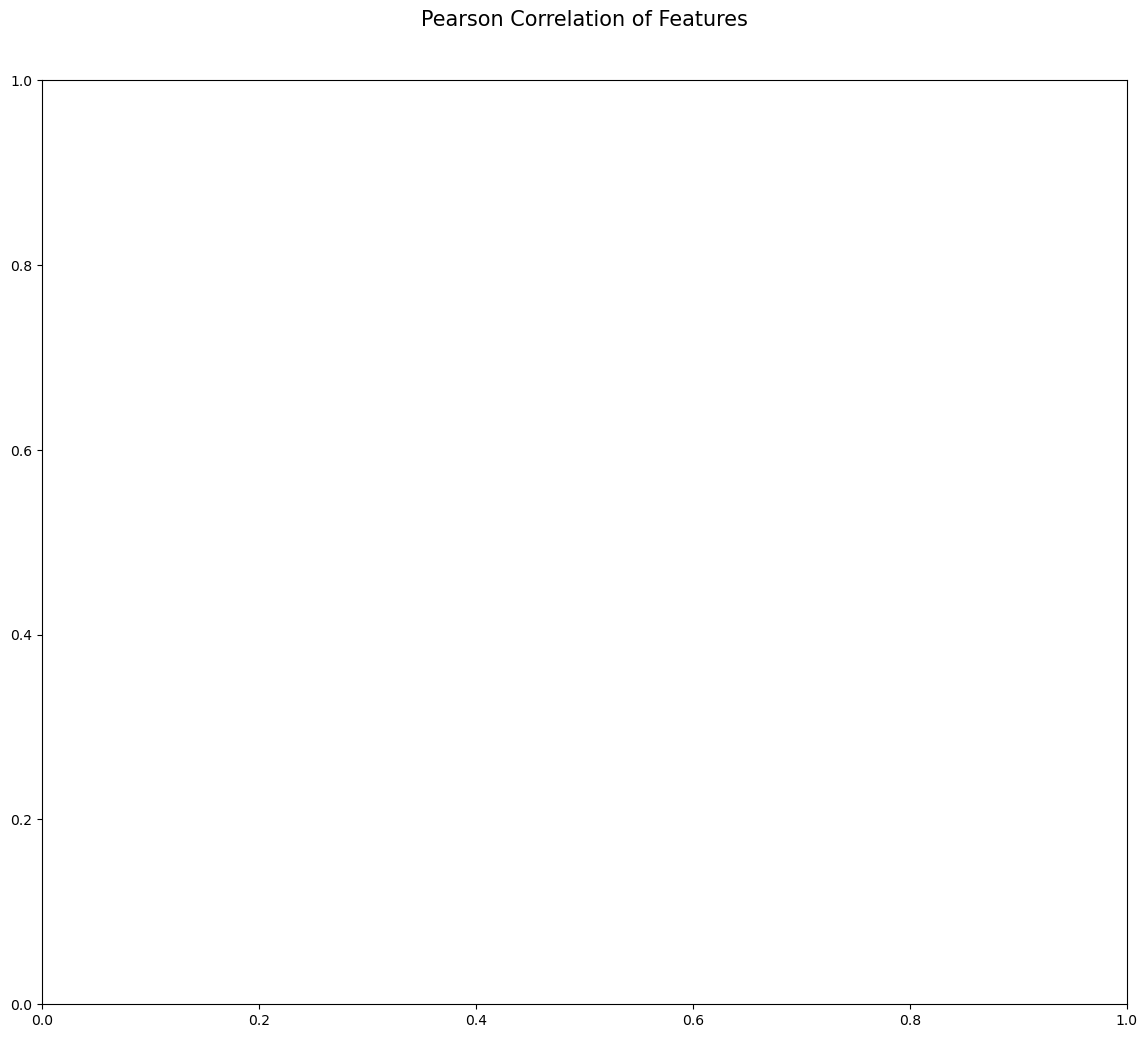

In [72]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Here we can see buisnes_year , clear_date_year are constant columns and should be removed

In [ ]:
X_train=X_train.drop(columns=['buisness_year'])
X_val=X_val.drop(columns=['buisness_year'])
X_test=X_test.drop(columns=['buisness_year'])

In [73]:
X_train


,business_code,cust_number,buisness_year,invoice_currency,total_open_amount,cust_payment_terms,due_term,due_in_date.days,due_in_date.month,due_in_date.year,baseline_create_date.days,baseline_create_date.month,baseline_create_date.year
0,1,656,2019.0,1,580.67,31,15,14,1,2019,30,12,2018
1,1,724,2019.0,1,15284.38,19,15,14,1,2019,30,12,2018
2,1,656,2019.0,1,28485.61,31,15,14,1,2019,30,12,2018
3,1,564,2019.0,1,186.40,17,15,14,1,2019,30,12,2018
4,1,288,2019.0,1,69249.78,17,15,14,1,2019,30,12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,1,737,2019.0,1,70.80,34,23,24,10,2019,1,10,2019
26124,1,1116,2019.0,1,3956.54,53,0,8,10,2019,8,10,2019
26125,1,545,2019.0,1,3382.80,10,32,9,11,2019,8,10,2019
26126,1,1114,2019.0,1,26520.00,29,35,12,11,2019,8,10,2019


# Modelling

## create a base model

In [74]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_predict = base_model.predict(X_val)

In [76]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

6.453618381819434

In [77]:
met = pd.DataFrame(zip(y_predict , y_val),columns=['Predicted','Actuals'])

## Tree Based model

In [78]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [79]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [80]:
y_predict2 = regressor.predict(X_val)

In [81]:
mean_squared_error(y_val, y_predict2, squared=False)

6.069428629281893

# Now predicting on the test set 

In [82]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

8.577268561633282

In [83]:
y_predict_test = base_model.predict(X_test)

In [84]:
mean_squared_error(y_val, y_predict2, squared=False)

6.069428629281893

In [85]:
X_train

,business_code,cust_number,buisness_year,invoice_currency,total_open_amount,cust_payment_terms,due_term,due_in_date.days,due_in_date.month,due_in_date.year,baseline_create_date.days,baseline_create_date.month,baseline_create_date.year
0,1,656,2019.0,1,580.67,31,15,14,1,2019,30,12,2018
1,1,724,2019.0,1,15284.38,19,15,14,1,2019,30,12,2018
2,1,656,2019.0,1,28485.61,31,15,14,1,2019,30,12,2018
3,1,564,2019.0,1,186.40,17,15,14,1,2019,30,12,2018
4,1,288,2019.0,1,69249.78,17,15,14,1,2019,30,12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,1,737,2019.0,1,70.80,34,23,24,10,2019,1,10,2019
26124,1,1116,2019.0,1,3956.54,53,0,8,10,2019,8,10,2019
26125,1,545,2019.0,1,3382.80,10,32,9,11,2019,8,10,2019
26126,1,1114,2019.0,1,26520.00,29,35,12,11,2019,8,10,2019


# Now on main_TEST set

In [86]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,0200726979,BJ'S llc,NaN,2020.0,1.930587e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,1.0,336.08,20200303.0,NAA8,1.930587e+09,1
9,U001,200418007,AM systems,NaN,2020.0,1.930841e+09,2020-05-01,20200430,20200501,20200516.0,USD,RV,1.0,33697.73,20200501.0,NAA8,1.930841e+09,1
11,U001,0200900212,CASEY us,NaN,2020.0,1.930823e+09,2020-04-24,20200424,20200424,20200509.0,USD,RV,1.0,24804.94,20200424.0,NAA8,1.930823e+09,1
16,U001,0200769623,WAL-MAR,NaN,2020.0,1.930834e+09,2020-04-29,20200428,20200429,20200514.0,USD,RV,1.0,4821.77,20200429.0,NAH4,1.930834e+09,1
19,U001,0200984794,GREA llc,NaN,2020.0,1.930703e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,8873.08,20200325.0,NAA8,1.930703e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U002,0200978592,PLAZA corporation,NaN,2020.0,1.990572e+09,2020-04-01,20200331,20200401,20200506.0,USD,RV,1.0,55792.19,20200401.0,NAG2,1.990572e+09,1
49994,U001,0200936373,SUPE trust,NaN,2020.0,1.930704e+09,2020-03-26,20200326,20200326,20200410.0,USD,RV,1.0,10912.65,20200326.0,NAA8,1.930704e+09,1
49996,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930799e+09,2020-04-18,20200418,20200418,20200503.0,USD,RV,1.0,2325.38,20200418.0,NAH4,1.930799e+09,1
49997,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930859e+09,2020-05-05,20200505,20200505,20200520.0,USD,RV,1.0,44462.63,20200505.0,NAH4,1.930859e+09,1


In [87]:
main_test.isna().sum()


business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [88]:
X_main_test = main_test.drop(['clear_date'],axis=1)


In [89]:
X_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,0200726979,BJ'S llc,2020.0,1.930587e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,1.0,336.08,20200303.0,NAA8,1.930587e+09,1
9,U001,200418007,AM systems,2020.0,1.930841e+09,2020-05-01,20200430,20200501,20200516.0,USD,RV,1.0,33697.73,20200501.0,NAA8,1.930841e+09,1
11,U001,0200900212,CASEY us,2020.0,1.930823e+09,2020-04-24,20200424,20200424,20200509.0,USD,RV,1.0,24804.94,20200424.0,NAA8,1.930823e+09,1
16,U001,0200769623,WAL-MAR,2020.0,1.930834e+09,2020-04-29,20200428,20200429,20200514.0,USD,RV,1.0,4821.77,20200429.0,NAH4,1.930834e+09,1
19,U001,0200984794,GREA llc,2020.0,1.930703e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,8873.08,20200325.0,NAA8,1.930703e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U002,0200978592,PLAZA corporation,2020.0,1.990572e+09,2020-04-01,20200331,20200401,20200506.0,USD,RV,1.0,55792.19,20200401.0,NAG2,1.990572e+09,1
49994,U001,0200936373,SUPE trust,2020.0,1.930704e+09,2020-03-26,20200326,20200326,20200410.0,USD,RV,1.0,10912.65,20200326.0,NAA8,1.930704e+09,1
49996,U001,0200769623,WAL-MAR co,2020.0,1.930799e+09,2020-04-18,20200418,20200418,20200503.0,USD,RV,1.0,2325.38,20200418.0,NAH4,1.930799e+09,1
49997,U001,0200769623,WAL-MAR in,2020.0,1.930859e+09,2020-05-05,20200505,20200505,20200520.0,USD,RV,1.0,44462.63,20200505.0,NAH4,1.930859e+09,1


# Preprocessing 

### same step as in above main train set 

In [90]:
# droping the constant features i.e document type ,posting_id,is_open
X_main_test = X_main_test.drop(columns = ['isOpen', 'posting_id','document type'])

In [91]:
#remove duplicate columns since invoice id and documnet id are the same
X_main_test= X_main_test.drop(columns=['doc_id'])

# Removing column having unique entries

In [92]:
# now since invice id in unique so we are going to drop it
X_main_test=X_main_test.drop(columns='invoice_id')

# Removing Irrelevent Columns

In [93]:
#now we are going to remove irrelevant columns which not effect predict model
X_main_test=X_main_test.drop(columns=['name_customer','document_create_date'])

# Date Time Conversion

In [94]:
X_main_test['document_create_date.1']=pd.to_datetime(X_main_test['document_create_date.1'], format='%Y%m%d')
X_main_test['due_in_date']=pd.to_datetime(X_main_test['due_in_date'], format='%Y%m%d')
X_main_test['baseline_create_date']=pd.to_datetime(X_main_test['baseline_create_date'], format='%Y%m%d')
X_main_test['posting_date']=pd.to_datetime(X_main_test['posting_date'])

# Sorting the entries by Posting date

In [95]:
X_main_test.sort_values(by=['posting_date'],inplace=True)

### some invoices are created before baseline create date so we are removing those here


In [96]:
temp1 = pd.Series(X_main_test['document_create_date.1'] - X_main_test['baseline_create_date']).dt.days

In [97]:
rows_to_drop = temp1.value_counts().to_frame(name = 'count')


In [98]:
# No. of rows to drop satisfying the condition
rows_to_drop[(rows_to_drop.index <0)].sum()

count    583
dtype: int64

In [99]:
X_main_test = X_main_test[((temp1==0) | (temp1>0))].reset_index(drop=True)

# now removing document_create_date.1 date since all the are now correct


In [100]:
X_main_test = X_main_test.drop(columns = ['document_create_date.1'])
X_main_test.dtypes , X_main_test.shape

(business_code                   object
 cust_number                     object
 buisness_year                  float64
 posting_date            datetime64[ns]
 due_in_date             datetime64[ns]
 invoice_currency                object
 total_open_amount              float64
 baseline_create_date    datetime64[ns]
 cust_payment_terms              object
 dtype: object,
 (9417, 9))

In [101]:
X_main_test['due_term']=pd.Series(X_main_test['due_in_date'] - X_main_test['baseline_create_date']).dt.days

In [102]:
X_main_test

,business_code,cust_number,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,due_term
0,U001,0200762950,2020.0,2020-02-27,2020-03-13,USD,140884.32,2020-02-27,NAA8,15
1,U001,0200726979,2020.0,2020-02-27,2020-03-13,USD,35.73,2020-02-27,NAA8,15
2,U001,0200759878,2020.0,2020-02-27,2020-05-02,USD,7446.60,2020-02-27,NAGD,65
3,U001,0200063296,2020.0,2020-02-27,2020-03-28,USD,20490.45,2020-02-27,NAD5,30
4,U013,0100011958,2020.0,2020-02-27,2020-04-12,USD,10594.06,2020-02-27,NAVF,45
...,...,...,...,...,...,...,...,...,...,...
9412,U001,0200712836,2020.0,2020-05-13,2020-05-28,USD,589.76,2020-05-13,NAA8,15
9413,U001,0200413833,2020.0,2020-05-13,2020-05-28,USD,33140.44,2020-05-13,NAA8,15
9414,U001,0200762950,2020.0,2020-05-13,2020-05-28,USD,136025.60,2020-05-13,NAA8,15
9415,U001,200875680,2020.0,2020-05-13,2020-05-28,USD,77253.74,2020-05-13,NAA8,15


# Label Encoding

In [103]:
# Again new classed are there in the main_test set
temp = set(X_main_test['business_code'])-set(business_code_encoder.classes_)
for items in temp:
    business_code_encoder.classes_= np.append(business_code_encoder.classes_,items)

X_main_test['business_code'] = business_code_encoder.transform(X_main_test['business_code'])

In [104]:
# Again new classed are there in the main_test set
temp1 = set(X_main_test['cust_number'])-set(cust_number_encoder.classes_)
for items in temp1:
    cust_number_encoder.classes_= np.append(cust_number_encoder.classes_,items)

X_main_test['cust_number'] = cust_number_encoder.transform(X_main_test['cust_number'])

In [105]:
# Again new classed are there in the main_test set
temp3 = set(X_main_test['invoice_currency'])-set(invoice_currency_encoder.classes_)
for items in temp3:
    invoice_currency_encoder.classes_= np.append(invoice_currency_encoder.classes_,items)

X_main_test['invoice_currency'] = invoice_currency_encoder.transform(X_main_test['invoice_currency'])

In [106]:
# Again new classed are there in the main_test set
temp4 = set(X_main_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for items in temp4:
    cust_payment_terms_encoder.classes_= np.append(cust_payment_terms_encoder.classes_,items)

X_main_test['cust_payment_terms'] = cust_payment_terms_encoder.transform(X_main_test['cust_payment_terms'])

In [107]:
X_main_test=X_main_test.drop(columns=['posting_date'])

In [108]:
X_main_test['due_in_date.days'] = X_main_test['due_in_date'].dt.day
X_main_test['due_in_date.month'] = X_main_test['due_in_date'].dt.month
X_main_test['due_in_date.year'] = X_main_test['due_in_date'].dt.year

In [109]:
X_main_test=X_main_test.drop(columns=['due_in_date'])

In [110]:
X_main_test['baseline_create_date.days'] = X_main_test['baseline_create_date'].dt.day
X_main_test['baseline_create_date.month'] = X_main_test['baseline_create_date'].dt.month
X_main_test['baseline_create_date.year'] = X_main_test['baseline_create_date'].dt.year

In [111]:
X_main_test=X_main_test.drop(columns=['baseline_create_date'])

In [112]:
#since we already know from corealtion matrix that business year is constant
X_main_test=X_main_test.drop(columns=['buisness_year'])

In [113]:
X_main_test

,business_code,cust_number,invoice_currency,total_open_amount,cust_payment_terms,due_term,due_in_date.days,due_in_date.month,due_in_date.year,baseline_create_date.days,baseline_create_date.month,baseline_create_date.year
0,1,643,1,140884.32,17,15,13,3,2020,27,2,2020
1,1,564,1,35.73,17,15,13,3,2020,27,2,2020
2,1,635,1,7446.60,30,65,2,5,2020,27,2,2020
3,1,304,1,20490.45,27,30,28,3,2020,27,2,2020
4,5,28,1,10594.06,45,45,12,4,2020,27,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
9412,1,540,1,589.76,17,15,28,5,2020,13,5,2020
9413,1,417,1,33140.44,17,15,28,5,2020,13,5,2020
9414,1,643,1,136025.60,17,15,28,5,2020,13,5,2020
9415,1,1221,1,77253.74,17,15,28,5,2020,13,5,2020


In [114]:
X_main_test.columns

Index(['business_code', 'cust_number', 'invoice_currency', 'total_open_amount',
       'cust_payment_terms', 'due_term', 'due_in_date.days',
       'due_in_date.month', 'due_in_date.year', 'baseline_create_date.days',
       'baseline_create_date.month', 'baseline_create_date.year'],
      dtype='object')

In [115]:
X_train.columns

Index(['business_code', 'cust_number', 'buisness_year', 'invoice_currency',
       'total_open_amount', 'cust_payment_terms', 'due_term',
       'due_in_date.days', 'due_in_date.month', 'due_in_date.year',
       'baseline_create_date.days', 'baseline_create_date.month',
       'baseline_create_date.year'],
      dtype='object')

# Final Prediction

In [116]:
final_result = regressor.predict(X_main_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- buisness_year


In [117]:
final_result = pd.Series(final_result,name='delay')

NameError: name 'final_result' is not defined

In [118]:
# resetting the index of main test so that we can merge price series with it
main_test.reset_index(drop=True,inplace=True)

In [119]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S llc,NaN,2020.0,1.930587e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,1.0,336.08,20200303.0,NAA8,1.930587e+09,1
1,U001,200418007,AM systems,NaN,2020.0,1.930841e+09,2020-05-01,20200430,20200501,20200516.0,USD,RV,1.0,33697.73,20200501.0,NAA8,1.930841e+09,1
2,U001,0200900212,CASEY us,NaN,2020.0,1.930823e+09,2020-04-24,20200424,20200424,20200509.0,USD,RV,1.0,24804.94,20200424.0,NAA8,1.930823e+09,1
3,U001,0200769623,WAL-MAR,NaN,2020.0,1.930834e+09,2020-04-29,20200428,20200429,20200514.0,USD,RV,1.0,4821.77,20200429.0,NAH4,1.930834e+09,1
4,U001,0200984794,GREA llc,NaN,2020.0,1.930703e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,8873.08,20200325.0,NAA8,1.930703e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U002,0200978592,PLAZA corporation,NaN,2020.0,1.990572e+09,2020-04-01,20200331,20200401,20200506.0,USD,RV,1.0,55792.19,20200401.0,NAG2,1.990572e+09,1
9996,U001,0200936373,SUPE trust,NaN,2020.0,1.930704e+09,2020-03-26,20200326,20200326,20200410.0,USD,RV,1.0,10912.65,20200326.0,NAA8,1.930704e+09,1
9997,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930799e+09,2020-04-18,20200418,20200418,20200503.0,USD,RV,1.0,2325.38,20200418.0,NAH4,1.930799e+09,1
9998,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930859e+09,2020-05-05,20200505,20200505,20200520.0,USD,RV,1.0,44462.63,20200505.0,NAH4,1.930859e+09,1


In [120]:
main_test['document_create_date.1']=pd.to_datetime(main_test['document_create_date.1'], format='%Y%m%d')
main_test['due_in_date']=pd.to_datetime(main_test['due_in_date'], format='%Y%m%d')
main_test['baseline_create_date']=pd.to_datetime(main_test['baseline_create_date'], format='%Y%m%d')
main_test['posting_date']=pd.to_datetime(main_test['posting_date'])

# some invoices are created before baseline create date so we are removing those here


In [121]:
temp_main = pd.Series(main_test['document_create_date.1'] - main_test['baseline_create_date']).dt.days
temp_main = pd.Series(main_test['document_create_date.1'] - main_test['baseline_create_date']).dt.days
rows_to_drop = temp_main.value_counts().to_frame(name = 'count')

In [122]:
# No. of rows to drop satisfying the condition
rows_to_drop[(rows_to_drop.index <0)].sum()

count    583
dtype: int64

In [123]:
main_test = main_test[((temp_main==0) | (temp_main>0))].reset_index(drop=True)

# Below table showing delays in payment mapped against Main_test 

In [124]:
Final = main_test.merge(final_result , on = X_main_test.index )
Final

NameError: name 'final_result' is not defined

# Calculating Predicted Payment Date

In [125]:
from datetime import timedelta, date

In [126]:
Final['INVOICE PAYMENT TERM']=Final['delay']

NameError: name 'Final' is not defined

In [127]:
Final['Predicted PAYMENT DATE'] = Final['due_in_date'] + pd.to_timedelta(np.ceil(Final['INVOICE PAYMENT TERM']),'D')

NameError: name 'Final' is not defined

In [121]:
Final = Final.drop(['INVOICE PAYMENT TERM'],axis=1)

In [122]:
Final.nunique()

key_0                     9417
business_code                5
cust_number                602
name_customer             1555
clear_date                   0
buisness_year                1
doc_id                    9153
posting_date                78
document_create_date        87
document_create_date.1      78
due_in_date                127
invoice_currency             2
document type                1
posting_id                   1
total_open_amount         8560
baseline_create_date        80
cust_payment_terms          36
invoice_id                9153
isOpen                       1
delay                       23
Predicted PAYMENT DATE     145
dtype: int64

In [123]:
def Ageing_Bucket(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [124]:
Final['Ageing Bucket']= pd.Series([Ageing_Bucket(x=int(Final['delay'][i]))  for i in range(len(Final))])

In [125]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,Predicted PAYMENT DATE,Ageing Bucket
0,0,U001,0200726979,BJ'S llc,NaN,2020.0,1.930587e+09,2020-03-03,20200302,2020-03-03,...,RV,1.0,336.08,2020-03-03,NAA8,1.930587e+09,1,1.014486,2020-03-20,(0-15) Days
1,1,U001,200418007,AM systems,NaN,2020.0,1.930841e+09,2020-05-01,20200430,2020-05-01,...,RV,1.0,33697.73,2020-05-01,NAA8,1.930841e+09,1,1.014486,2020-05-18,(0-15) Days
2,2,U001,0200900212,CASEY us,NaN,2020.0,1.930823e+09,2020-04-24,20200424,2020-04-24,...,RV,1.0,24804.94,2020-04-24,NAA8,1.930823e+09,1,-4.244582,2020-05-05,(< 0) Days
3,3,U001,0200769623,WAL-MAR,NaN,2020.0,1.930834e+09,2020-04-29,20200428,2020-04-29,...,RV,1.0,4821.77,2020-04-29,NAH4,1.930834e+09,1,7.031008,2020-05-22,(0-15) Days
4,4,U001,0200984794,GREA llc,NaN,2020.0,1.930703e+09,2020-03-25,20200325,2020-03-25,...,RV,1.0,8873.08,2020-03-25,NAA8,1.930703e+09,1,-5.397490,2020-04-04,(< 0) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9412,9412,U002,0200978592,PLAZA corporation,NaN,2020.0,1.990572e+09,2020-04-01,20200331,2020-04-01,...,RV,1.0,55792.19,2020-04-01,NAG2,1.990572e+09,1,1.014486,2020-05-08,(0-15) Days
9413,9413,U001,0200936373,SUPE trust,NaN,2020.0,1.930704e+09,2020-03-26,20200326,2020-03-26,...,RV,1.0,10912.65,2020-03-26,NAA8,1.930704e+09,1,1.014486,2020-04-12,(0-15) Days
9414,9414,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930799e+09,2020-04-18,20200418,2020-04-18,...,RV,1.0,2325.38,2020-04-18,NAH4,1.930799e+09,1,1.014486,2020-05-05,(0-15) Days
9415,9415,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930859e+09,2020-05-05,20200505,2020-05-05,...,RV,1.0,44462.63,2020-05-05,NAH4,1.930859e+09,1,33.412500,2020-06-23,(31-45) Days


In [126]:
Final = Final.drop(['key_0'],axis=1)

In [127]:
Final.head(200)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,Predicted PAYMENT DATE,Ageing Bucket
0,U001,0200726979,BJ'S llc,NaN,2020.0,1.930587e+09,2020-03-03,20200302,2020-03-03,2020-03-18,...,RV,1.0,336.08,2020-03-03,NAA8,1.930587e+09,1,1.014486,2020-03-20,(0-15) Days
1,U001,200418007,AM systems,NaN,2020.0,1.930841e+09,2020-05-01,20200430,2020-05-01,2020-05-16,...,RV,1.0,33697.73,2020-05-01,NAA8,1.930841e+09,1,1.014486,2020-05-18,(0-15) Days
2,U001,0200900212,CASEY us,NaN,2020.0,1.930823e+09,2020-04-24,20200424,2020-04-24,2020-05-09,...,RV,1.0,24804.94,2020-04-24,NAA8,1.930823e+09,1,-4.244582,2020-05-05,(< 0) Days
3,U001,0200769623,WAL-MAR,NaN,2020.0,1.930834e+09,2020-04-29,20200428,2020-04-29,2020-05-14,...,RV,1.0,4821.77,2020-04-29,NAH4,1.930834e+09,1,7.031008,2020-05-22,(0-15) Days
4,U001,0200984794,GREA llc,NaN,2020.0,1.930703e+09,2020-03-25,20200325,2020-03-25,2020-04-09,...,RV,1.0,8873.08,2020-03-25,NAA8,1.930703e+09,1,-5.397490,2020-04-04,(< 0) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,U001,200936373,SUPE trust,NaN,2020.0,1.930632e+09,2020-03-10,20200310,2020-03-10,2020-05-14,...,RV,1.0,18224.92,2020-03-10,NAGD,1.930632e+09,1,1.014486,2020-05-16,(0-15) Days
196,U001,0200726979,BJ'S llc,NaN,2020.0,1.930780e+09,2020-04-12,20200413,2020-04-12,2020-04-27,...,RV,1.0,1361.10,2020-04-12,NAA8,1.930780e+09,1,-1.899685,2020-04-26,(< 0) Days
197,U001,0200592182,DECA corp,NaN,2020.0,1.930638e+09,2020-03-11,20200311,2020-03-11,2020-03-24,...,RV,1.0,54.00,2020-03-01,NAM4,1.930638e+09,1,1.014486,2020-03-26,(0-15) Days
198,U001,0200726979,BJ'S in,NaN,2020.0,1.930723e+09,2020-03-31,20200331,2020-03-31,2020-04-15,...,RV,1.0,750.26,2020-03-31,NAA8,1.930723e+09,1,-1.899685,2020-04-14,(< 0) Days
